In [1]:
import numpy as np
from pandas.plotting import scatter_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import cross_val_score,GridSearchCV

In [5]:
data = pd.read_csv('C:\\Users\\Jarvis\\Desktop\\TSF\\Task-4\\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# there are no missing values

In [8]:
print(data.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [9]:
setosa = data[data['Species']=='Iris-setosa']
versicolor = data[data['Species']=='Iris-versicolor']
virginica = data[data['Species']=='Iris-virginica']

print(setosa.describe())
print('\n',versicolor.describe())
print('\n',virginica.describe())

             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min     51.00000       4.900000 

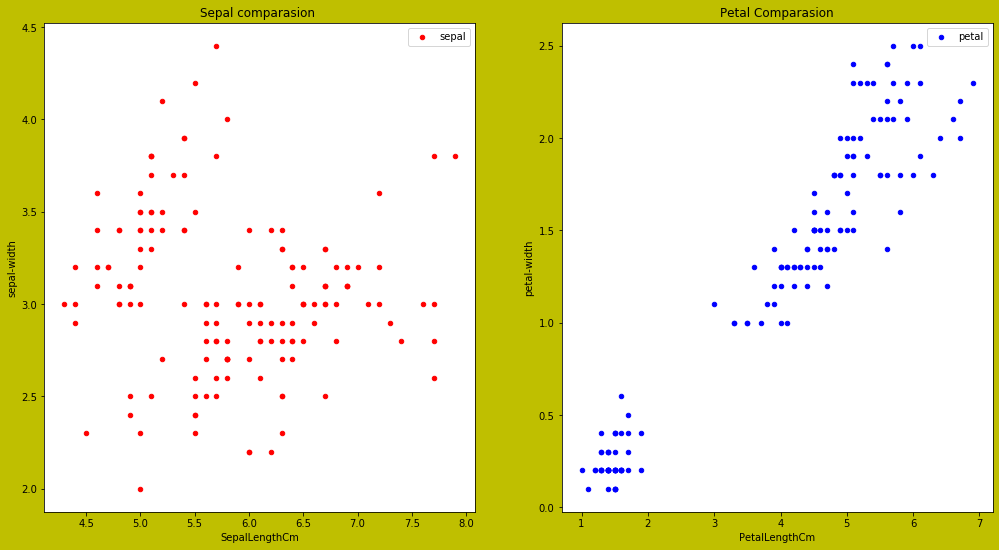

In [10]:
fig,ax=plt.subplots(1,2,figsize=(17, 9), facecolor = 'y', edgecolor = 'b')
data.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
data.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

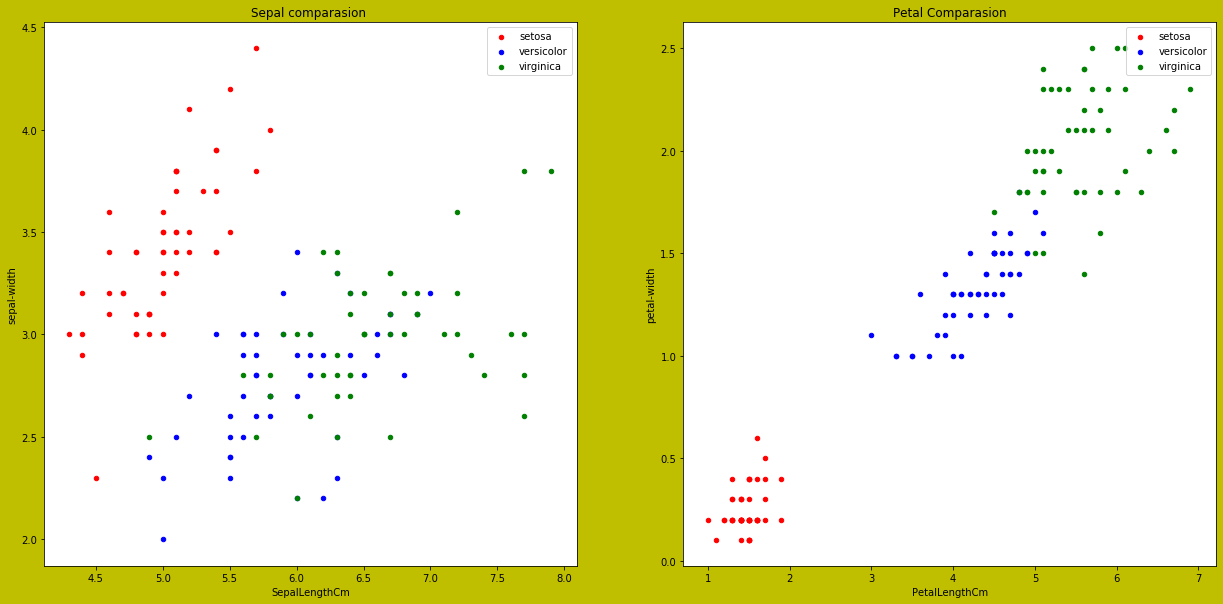

In [11]:
fig,ax=plt.subplots(1,2,figsize=(21, 10), facecolor = 'y', edgecolor = 'b')

setosa.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

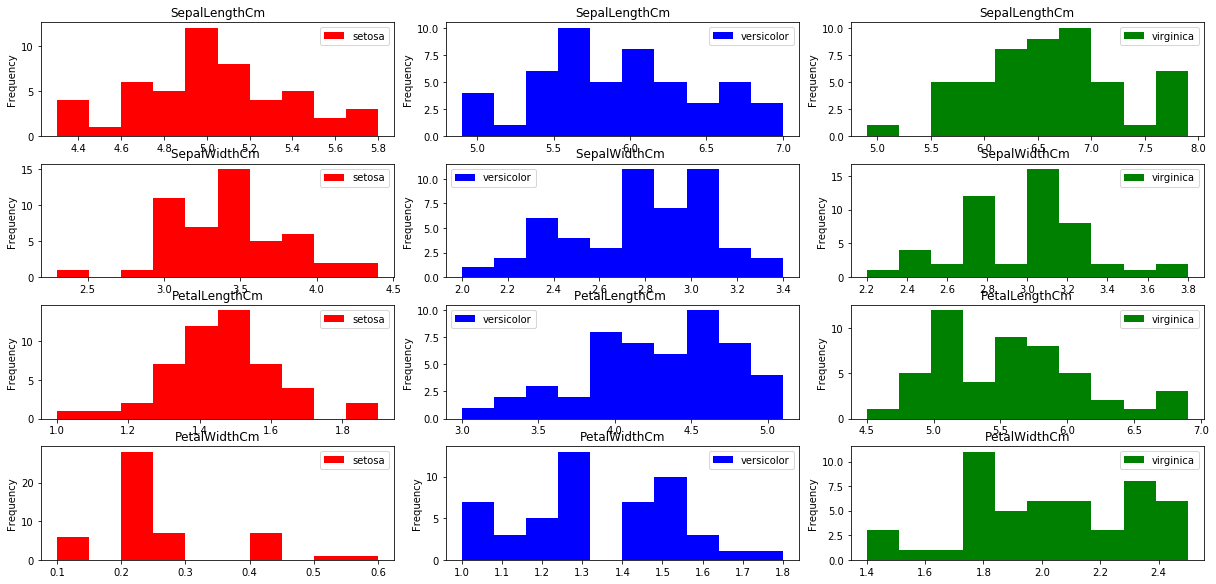

In [12]:
fig,ax=plt.subplots(4,3,figsize=(17, 8))
setosa["SepalLengthCm"].plot(kind="hist", ax=ax[0][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalLengthCm"].plot(kind="hist", ax=ax[0][1],label="versicolor",color='b',fontsize=10)
virginica["SepalLengthCm"].plot( kind="hist",ax=ax[0][2],label="virginica",color='g',fontsize=10)

setosa["SepalWidthCm"].plot(kind="hist", ax=ax[1][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalWidthCm"].plot(kind="hist", ax=ax[1][1],label="versicolor",color='b',fontsize=10)
virginica["SepalWidthCm"].plot( kind="hist",ax=ax[1][2],label="virginica",color='g',fontsize=10)

setosa["PetalLengthCm"].plot(kind="hist", ax=ax[2][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalLengthCm"].plot(kind="hist", ax=ax[2][1],label="versicolor",color='b',fontsize=10)
virginica["PetalLengthCm"].plot( kind="hist",ax=ax[2][2],label="virginica",color='g',fontsize=10)


setosa["PetalWidthCm"].plot(kind="hist", ax=ax[3][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalWidthCm"].plot(kind="hist", ax=ax[3][1],label="versicolor",color='b',fontsize=10)
virginica["PetalWidthCm"].plot( kind="hist",ax=ax[3][2],label="virginica",color='g',fontsize=10)

plt.rcParams.update({'font.size': 10})
plt.tight_layout()

ax[0][0].set(title='SepalLengthCm')
ax[0][1].set(title='SepalLengthCm')
ax[0][2].set(title='SepalLengthCm')
ax[1][0].set(title='SepalWidthCm ')
ax[1][1].set(title='SepalWidthCm ')
ax[1][2].set(title='SepalWidthCm ')
ax[2][0].set(title='PetalLengthCm')
ax[2][1].set(title='PetalLengthCm ')
ax[2][2].set(title='PetalLengthCm')
ax[3][0].set(title='PetalWidthCm')
ax[3][1].set(title='PetalWidthCm')
ax[3][2].set(title='PetalWidthCm')

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()
ax[2][0].legend()
ax[2][1].legend()
ax[2][2].legend()
ax[3][0].legend()
ax[3][1].legend()
ax[3][2].legend()
plt.show()

C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1224x648 with 0 Axes>

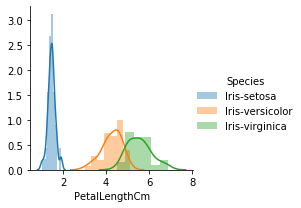

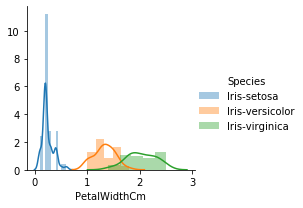

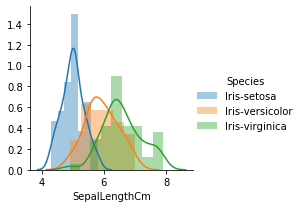

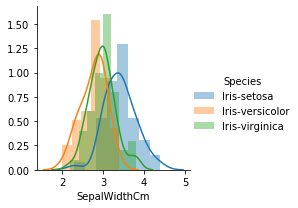

In [13]:
plt.figure(figsize=(17, 9), facecolor = 'y', edgecolor = 'b')
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"PetalLengthCm",).add_legend()
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"PetalWidthCm",).add_legend()
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"SepalLengthCm",).add_legend()
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

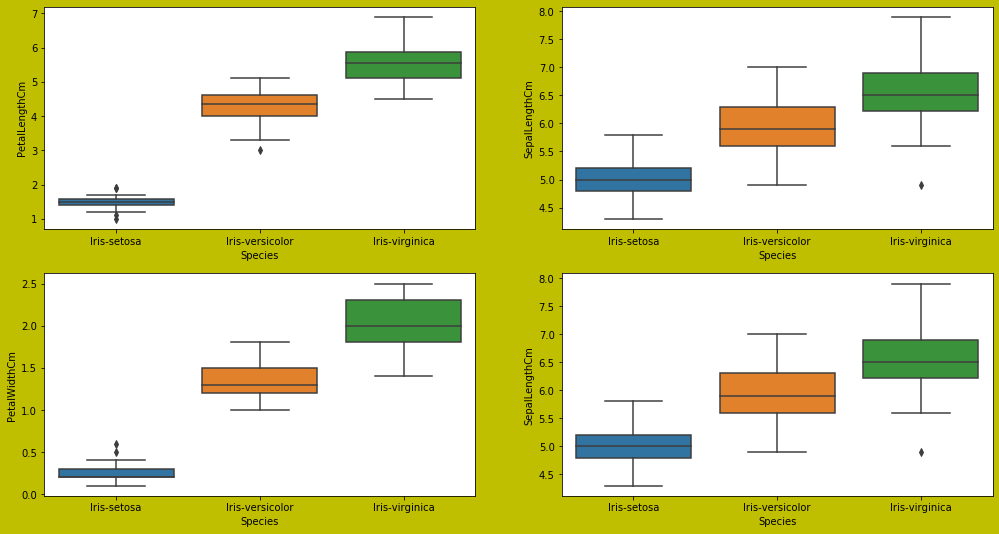

In [14]:

fig,ax=plt.subplots(2,2,figsize=(17, 9), facecolor = 'y', edgecolor = 'b')
sns.boxplot(x="Species",y="PetalLengthCm",data=data,ax = ax[0][0])
sns.boxplot(x="Species",y="SepalLengthCm",data=data,ax = ax[0][1])
sns.boxplot(x="Species",y="PetalWidthCm",data=data,ax = ax[1][0])
sns.boxplot(x="Species",y="SepalLengthCm",data=data,ax = ax[1][1])
plt.show()

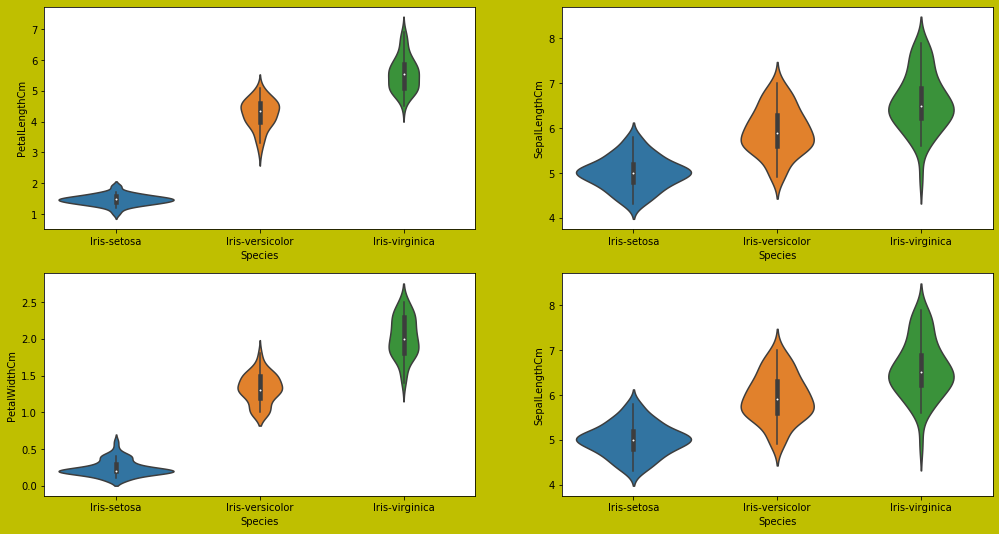

In [15]:
fig,ax=plt.subplots(2,2,figsize=(17, 9), facecolor = 'y', edgecolor = 'b')
sns.violinplot(x="Species",y="PetalLengthCm",data=data,ax = ax[0][0])
sns.violinplot(x="Species",y="SepalLengthCm",data=data,ax = ax[0][1])
sns.violinplot(x="Species",y="PetalWidthCm",data=data,ax = ax[1][0])
sns.violinplot(x="Species",y="SepalLengthCm",data=data,ax = ax[1][1])
plt.show()

# Data Preprocessing

In [16]:
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [19]:
x_new = pd.DataFrame(x)
x_new.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


# Model training and evaluation
Checking average accuracy score using KFold Cross Validation

In [20]:
model = DecisionTreeClassifier()
scores = cross_val_score(estimator=model, X=x, y=y, cv=7,)
print('The average accuracy score is: ',scores.mean() * 100)

The average accuracy score is:  95.3308596165739


# Hyper-parameter tuning using GridSearch Cross Validation

In [21]:
param_grid = { 
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}
final_model = GridSearchCV(model,param_grid,cv = 5)

In [22]:
final_model.fit(x,y)
final_model.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [23]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=4)
clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Plotting the tree obtained using sklearn tree module

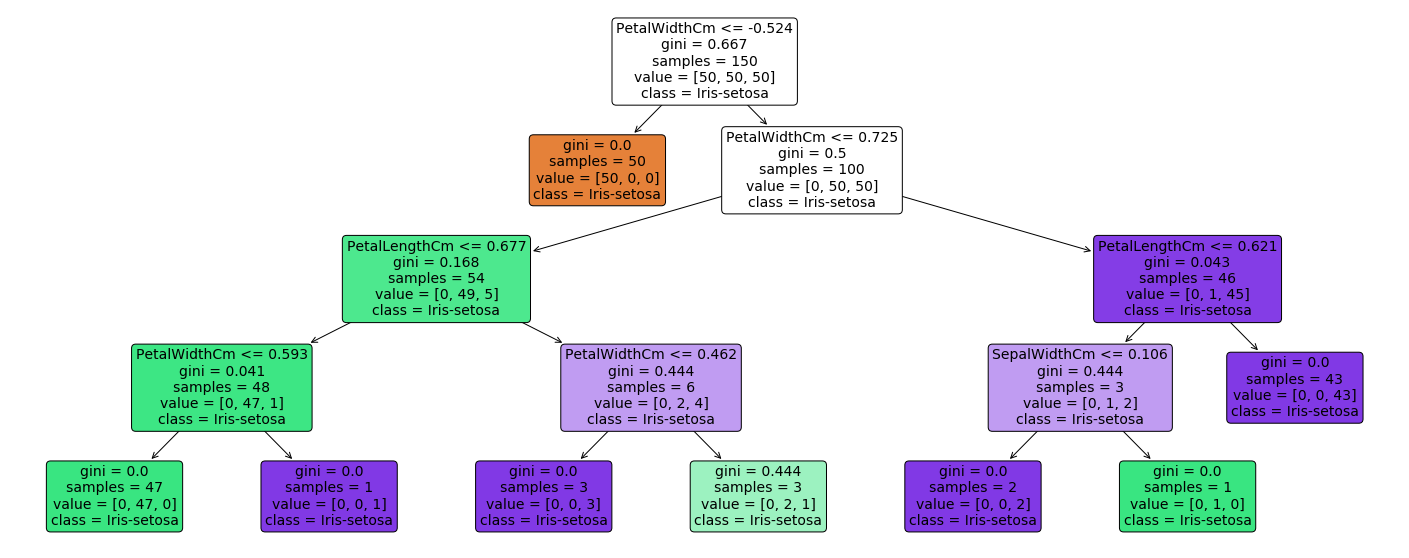

In [24]:
plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',], 
              class_names=data['Species'], 
              filled=True, 
              rounded=True, 
              fontsize=14)